In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import Perceptron

Load the dataset.

The last column is the target column.
Last 30% rows of the dataset constitute test set and remaining rows form the training set.
Do not shuffle the dataset while splitting
You must have to use only training set to train all the estimator in questions below.
First row of the file has column names/ids, and it has no index column.
Instantiate a perceptron classifier that with following parameters:

	random_state = 1729
	learning rate = 1
	Train for appropriate number of iterations
	Do not shuffle the dataset for each iteration.
	Include the intercept (bias) term.
	Use 10% of the data for validation fraction.
	Do not apply regularization.
	Set warm start to true.
Hint: one iteration of training indicates going over each sample exactly once.

Train the classifier on the training data.


Train the perceptron classifier for 5 iterations.

In [4]:
df = pd.read_csv('/content/T124OPPE2_ModelBuilding_V1.csv')
df.head()

,Gender,Age,HasTension,AnyHeartDisease,NeverMarried,Occupation_Govt_job,Occupation_Never_worked,Occupation_Private,Occupation_Self-employed,Occupation_children,LivesIn,GlucoseLevel,BMI,SmokingStatus_formerly smoked,SmokingStatus_never smoked,SmokingStatus_smokes,HeartAttack
0,0.0,0.433901,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.203263,0.284421,0.0,1.0,0.0,0
1,1.0,-1.840435,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.386014,-1.186687,0.0,1.0,0.0,0
2,1.0,-1.160260,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.326807,0.065045,0.0,1.0,0.0,0
3,1.0,-0.806002,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.182284,0.929643,0.0,1.0,0.0,0
4,0.0,0.743876,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.200466,-0.412420,0.0,0.0,1.0,1


In [5]:
df.shape

(4000, 17)

Splitting the dataset in to train and test data.

First 70% of the data belong to train data and last 30% of data belong to test

In [6]:
train_size = int(len(df) * 0.7)

In [7]:
train = df.iloc[:train_size]
test = df.iloc[train_size:]

In [36]:
train.shape

(2800, 17)

In [37]:
test.shape

(1200, 17)

In [8]:
X_train = train.iloc[:,:-1]
y_train = train.iloc[:,-1]
X_test = test.iloc[:,:-1]
y_test = test.iloc[:,-1]

In [39]:
X_train.shape

(2800, 16)

In [12]:
X_test.shape

(1200, 16)

In [13]:
y_train.shape

(2800,)

In [14]:
y_test.shape

(1200,)

Applying perceptron algorithm with the following parameters

random_state = 1729

learning rate = 1

Train for appropriate number of iterations

Do not shuffle the dataset for each iteration.

Include the intercept (bias) term.

Use 10% of the data for validation fraction.

Do not apply regularization.

Set warm start to true.

In [40]:
from sklearn.linear_model import Perceptron
perceptron_model = Perceptron(
    eta0=1, random_state=1729,
    validation_fraction=0.1,
    warm_start=True,
    fit_intercept=True,
    shuffle=False,
    max_iter=1,
    penalty=None)

In [41]:
for i in range(5):
  perceptron_model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

Q) What is value of bias (intercept) after 5th iteration?

In [42]:
perceptron_model.intercept_

array([-3.])

In continuation of the previous question, compute precision accurate upto 2 decimal places on training data for positive class (i.e. class value 1), after 5 iterations.

[Hint: Use estimator trained from the previous question]

In [43]:
from sklearn.metrics import precision_score
y_pred = perceptron_model.predict(X_train)
prec_score = precision_score(y_train, y_pred, pos_label=1)
print(prec_score)
print(round(prec_score,2))

0.6666666666666666
0.67


Train (on training data only) logistic regression using SGDClassifier. Use the following parameters:

	Choose appropriate loss value to obtain logistic regression
	penalty='l2',
	eta0=0.001,
	alpha=0,
	learning_rate='constant'
	random_state=1729.
	warm_start = True

Train the classifier for 5 iterations and note the value of the loss in each iteration. What will be the loss value after second iteration? Answer upto three decimal places.

Note: Set the remaining parameters, if any, accordingly to be able to get the loss value after second iteration. Also note that the classifier has to be trained for 5 iterations.

In [44]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import log_loss

In [45]:
SGDC_model = SGDClassifier(
    loss='log_loss',
    penalty='l2',
    eta0=0.001,
    alpha=0,
    learning_rate='constant',
    random_state=1729,
    warm_start=True,
    max_iter=1
)



In [46]:
for i in range(5):
  SGDC_model.fit(X_train, y_train)
  y_pred_prob = SGDC_model.predict_proba(X_train)
  print(f"Log loss after iteration {i} is {log_loss(y_train, y_pred_prob)}")

Log loss after iteration 0 is 0.2529904609012919
Log loss after iteration 1 is 0.20828682141739835
Log loss after iteration 2 is 0.19406901833322654
Log loss after iteration 3 is 0.18699850891012404
Log loss after iteration 4 is 0.18255077295024025


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic

Use GridSearchCV with SGDClassifier. Following are the classifier's parameters:

	loss = 'log_loss'
	learning_rate = 'constant'
	random_state = 1729

Following are parameters to examine:

	alpha = [0.0001, 0.0005, 0.001, 0.005]
	eta0 = [0.01, 0.05, 0.1, 0.5]

What are the best values of alpha and eta0 respectively?

In [10]:
from sklearn.linear_model import SGDClassifier
SGDC_model_grid = SGDClassifier(
    loss='log_loss',
    learning_rate='constant',
    random_state=1729
)

In [11]:
param_grid = {
    'alpha':[0.0001, 0.0005, 0.001, 0.005],
    'eta0':[0.01, 0.05, 0.1, 0.5]
}

In [12]:
from sklearn.model_selection import GridSearchCV
grid_search_SGDC = GridSearchCV(
    param_grid=param_grid,
    estimator=SGDC_model_grid,
    cv=5
)

In [13]:
grid_search_SGDC.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=SGDClassifier(learning_rate='constant', loss='log_loss',
                                     random_state=1729),
             param_grid={'alpha': [0.0001, 0.0005, 0.001, 0.005],
                         'eta0': [0.01, 0.05, 0.1, 0.5]})

What are the best values of alpha and eta0 respectively?

In [14]:
print("Best alpha:",grid_search_SGDC.best_params_['alpha'])
print("Best eta0:",grid_search_SGDC.best_params_['eta0'])

Best alpha: 0.0001
Best eta0: 0.01


Create a new estimator using SGDClassifier that uses the best parameters obtained in Gridsearch earlier ((learning rate to be constant, random_state to be '1729' and use appropriate loss for logistic regression)) and set the weight of class 0 to be 0.1 and the weight of class 1 to be 2. How many samples of class 1 from the test set are correctly predicted by this estimator?

In [15]:
SGDC_model_new = SGDClassifier(
    loss="log_loss",
    learning_rate='constant',
    alpha=0.0001,
    eta0=0.01,
    random_state=1729,
    class_weight={0:0.1,1:2}
)

In [16]:
SGDC_model_new.fit(X_train, y_train)

SGDClassifier(class_weight={0: 0.1, 1: 2}, eta0=0.01, learning_rate='constant',
              loss='log_loss', random_state=1729)

In [17]:
y_pred_new = SGDC_model_new.predict(X_test)

In [18]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred_new)

Plotting the confusion matrix

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

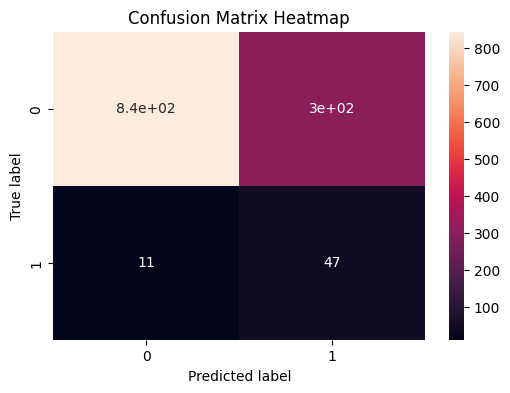

In [20]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix Heatmap")
plt.show()

How many samples of class 1 from the test set are correctly predicted by this estimator?

In [21]:
print(f"No of samples of class 1 from the test set correctly predicted bt the estimator is {cm[1][1]}")

No of samples of class 1 from the test set correctly predicted bt the estimator is 47


Confusion Matrix Display

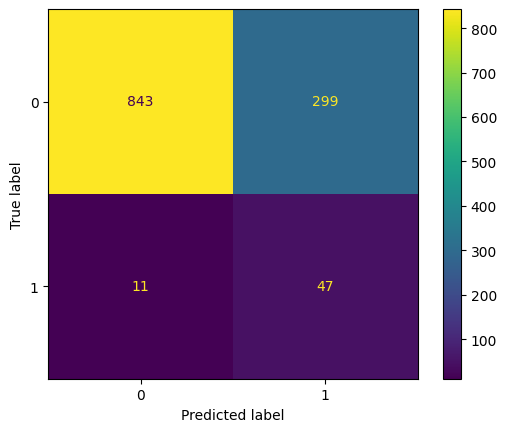

In [22]:
ConfusionMatrixDisplay(cm).plot()

Fit an SVM classifier with following parameters:

	kernel='rbf'
	decision_function_shape='ovr'
	random_state=1729
	C=1

Train the model on training data, and print the confusion matrix on test data.

In [23]:
from sklearn.svm import SVC

In [24]:
svc_model = SVC(
    kernel='rbf',
    decision_function_shape='ovr',
    random_state=1729,
    C=1
)

In [25]:
svc_model.fit(X_train, y_train)

SVC(C=1, random_state=1729)

In [26]:
y_pred = svc_model.predict(X_test)

In [27]:
cm_svc = confusion_matrix(y_test, y_pred)

In [29]:
print(cm_svc)

[[1142    0]
 [  58    0]]


Text(0.5, 1.0, 'Confusion Matrix Heatmap')

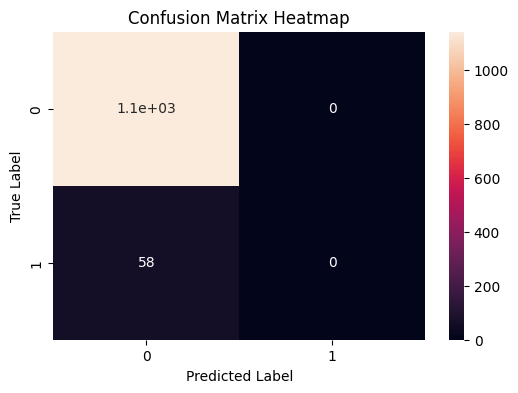

In [31]:
plt.figure(figsize=(6,4))
sns.heatmap(cm_svc, annot=True)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')

Confusion Matrix Display

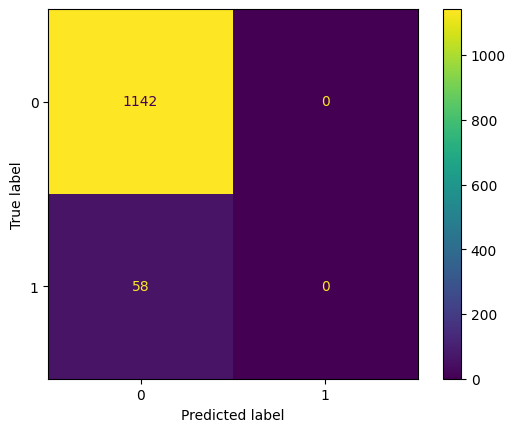

In [30]:
ConfusionMatrixDisplay(cm_svc).plot()

Train a Decision Tree Classifier with the following properties:

	criterion = 'entropy',
	splitter = 'random',
	min_samples_split = 4,
	min_impurity_decrease = 0.0001,
	random_state = 1729

What is the resultant depth of the tree?

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
DTC_model = DecisionTreeClassifier(
    criterion='entropy',
    splitter='random',
    min_samples_split=4,
    min_impurity_decrease=0.0001,
    random_state=1729
)

In [35]:
DTC_model.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', min_impurity_decrease=0.0001,
                       min_samples_split=4, random_state=1729,
                       splitter='random')

In [36]:
DTC_model.get_depth()

20

How many nodes are there in the tree?

In [37]:
DTC_model.tree_.node_count

515

What is the value of entropy at the left child of root?

In [38]:
DTC_model.tree_.impurity[1]

np.float64(0.024564134553940277)